In [103]:
import pandas as pd
# Import numpy
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [104]:
from typing import Union
from datetime import datetime

marketing = pd.read_csv('../input_files/marketing.csv')

marketing.shape

(10037, 12)

In [105]:
# print the first five rows of marketing DataFrame
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [106]:
# print the summary statistics of all columns in the marketing DataFrame
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [107]:
# Check column data types and non-missing values
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [108]:
# Check the data type of is_retained
marketing['is_retained'].dtype

dtype('O')

In [109]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

marketing['is_retained'].dtype

dtype('bool')

In [110]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2,
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

marketing['channel_code'].unique()

array([ 1.,  4.,  5.,  3.,  2., nan])

In [111]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_displayed'] == marketing['language_preferred'], "Yes","No")

marketing['is_correct_lang'].unique()

array(['Yes', 'No'], dtype=object)

In [112]:
# Convert date columns to datetime
date_columns = ['date_served', 'date_subscribed', 'date_canceled']
for column in date_columns:
    marketing[column] = pd.to_datetime(marketing[column], format='%m/%d/%y', errors='coerce')

# Add a DoW column
marketing['DoW'] = marketing['date_served'].dt.dayofweek

# Validate unique values for ne column
marketing['DoW'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

In [113]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby('date_served')['user_id'].nunique()

daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

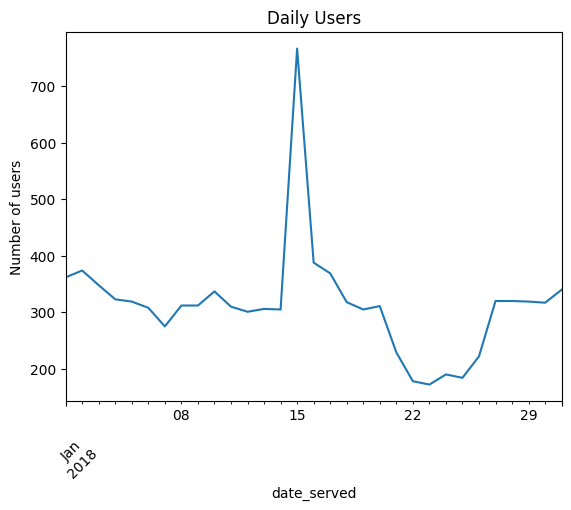

In [114]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily Users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [115]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total

print(round(conversion_rate*100, 2), '%')

13.89 %


In [116]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
print(total_subscribers)
# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
print(retained)
# Calculate the retention rate
retention_rate = retained/total_subscribers
print(retention_rate)
print(round(retention_rate*10, 2), "%") # I need to check this value

1015
6967
6.864039408866995
68.64 %


In [117]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [118]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [119]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


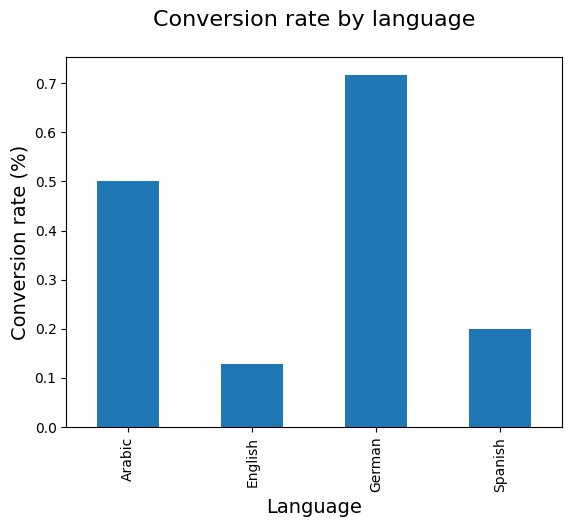

In [120]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind="bar")

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

In [121]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [122]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served',
                              'conversion_rate']

daily_conversion_rate

,date_served,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392
5,2018-01-06,0.113636
6,2018-01-07,0.141818
7,2018-01-08,0.115385
8,2018-01-09,0.125000
9,2018-01-10,0.118694


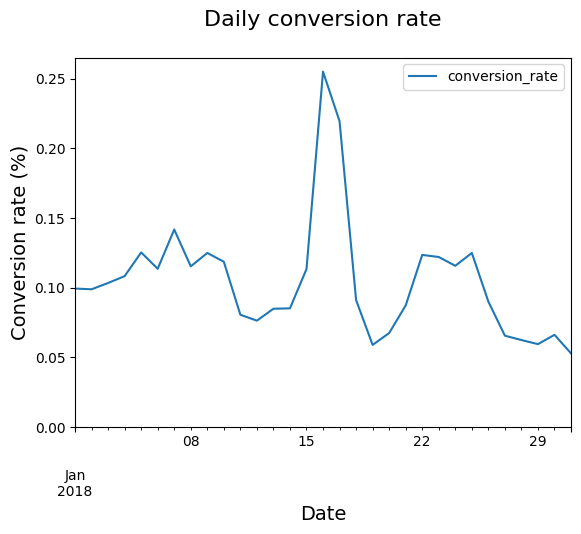

In [123]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served',
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

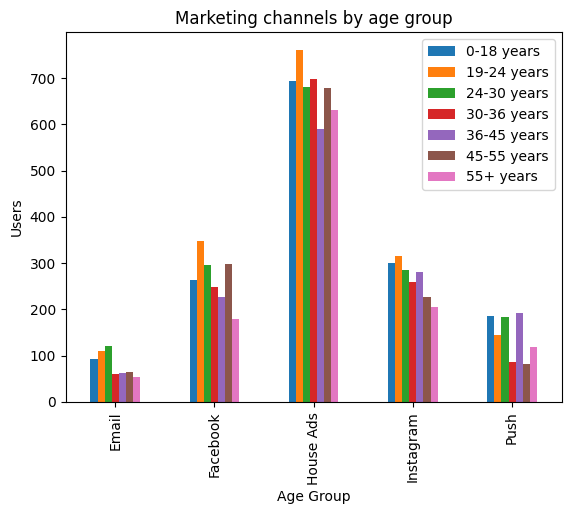

In [124]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right',
           labels = channel_age_df.columns.values)
plt.show()

In [125]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [126]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True].groupby(['date_subscribed',
                                       "subscribing_channel"])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


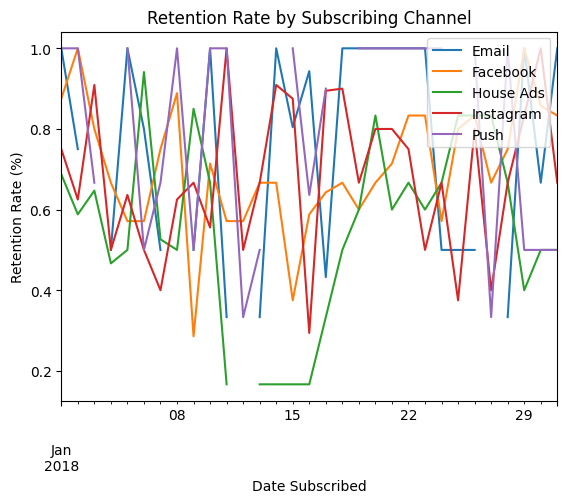

In [127]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
# Add a legend to the plot
plt.legend(loc = 'upper right',
           labels = retention_rate_df.columns.values)
plt.show()

In [128]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number of users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Conversion rate
    conversion_rate = column_conv/column_total

    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


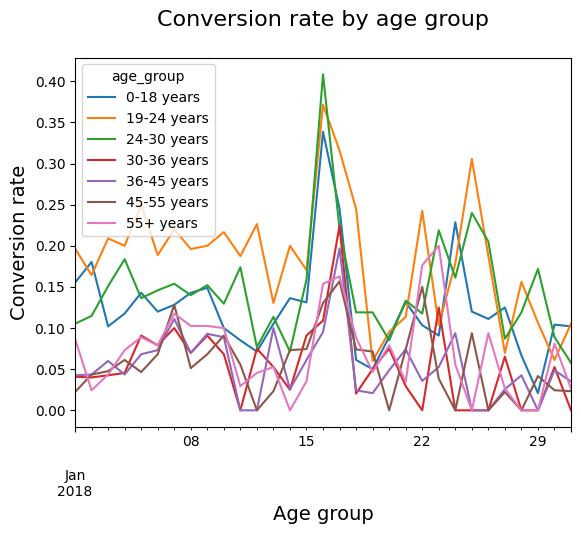

In [129]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [130]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n',
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

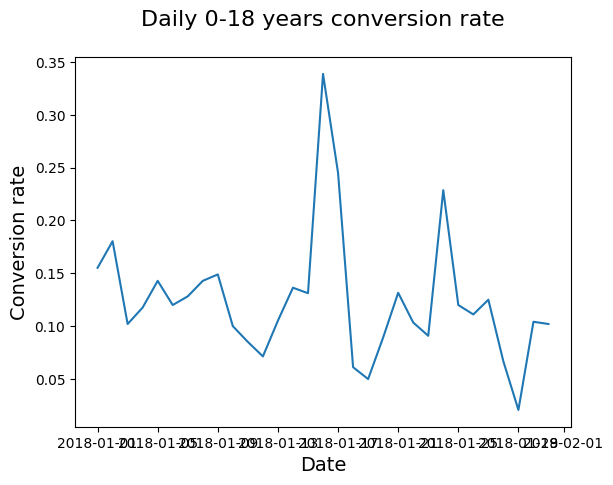

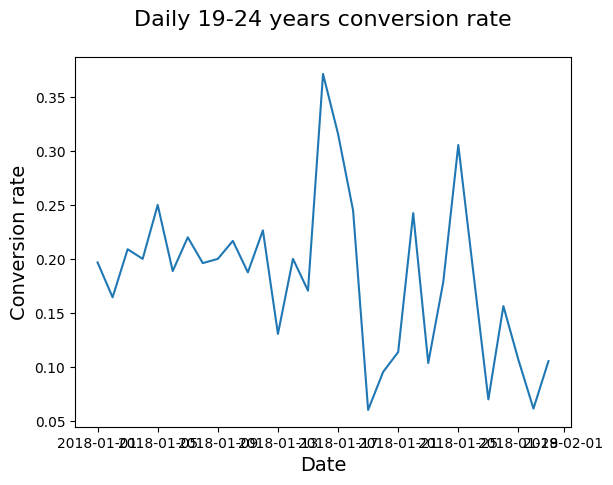

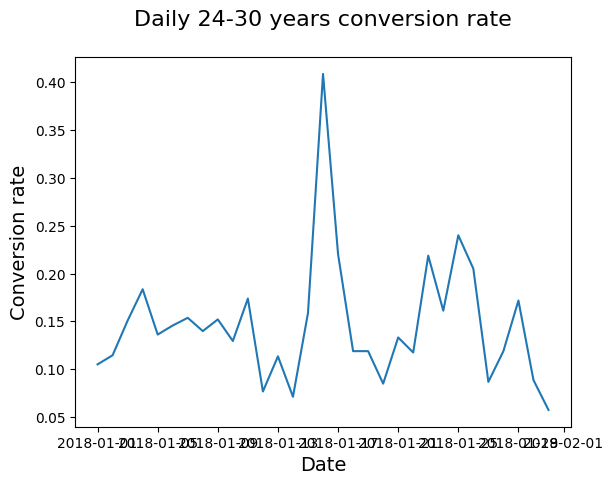

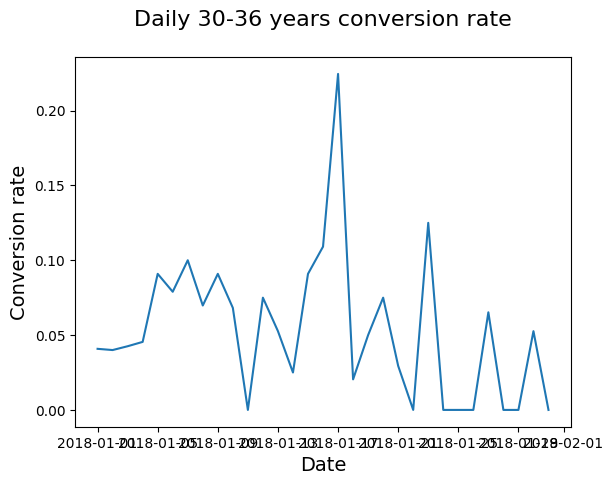

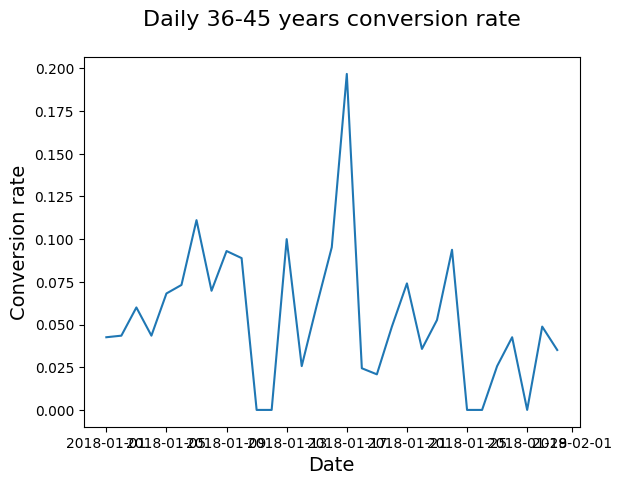

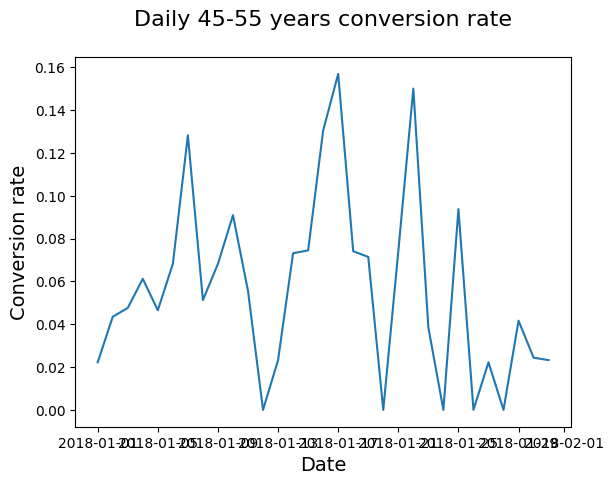

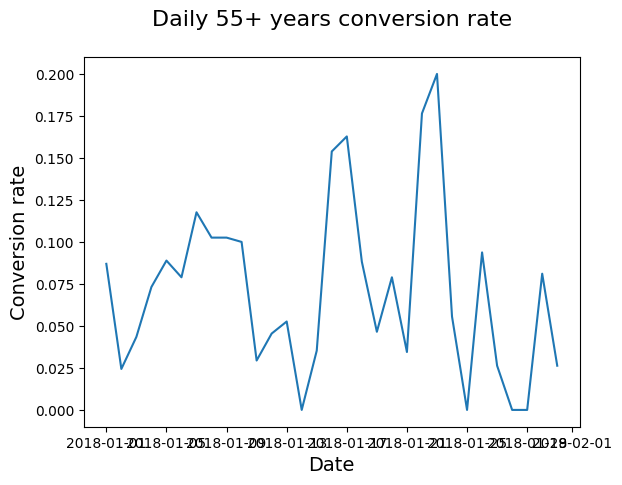

<Figure size 640x480 with 0 Axes>

In [131]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served','age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)


In [132]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


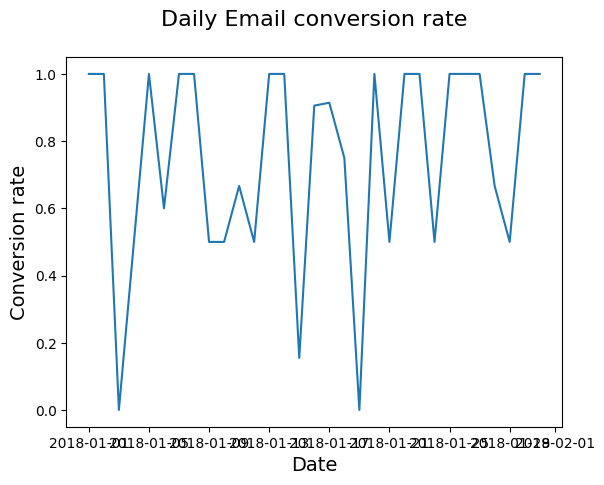

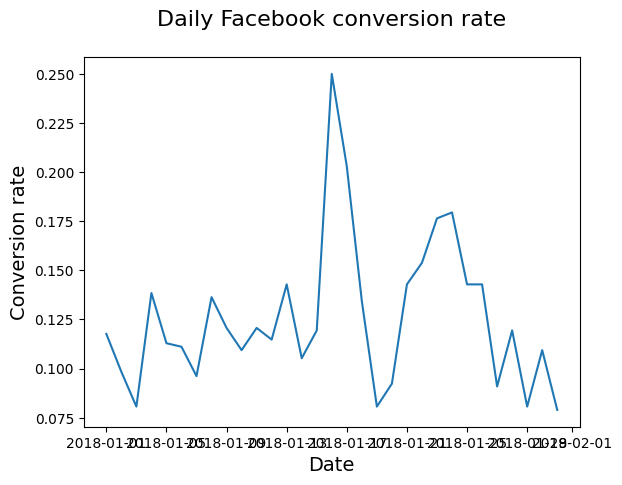

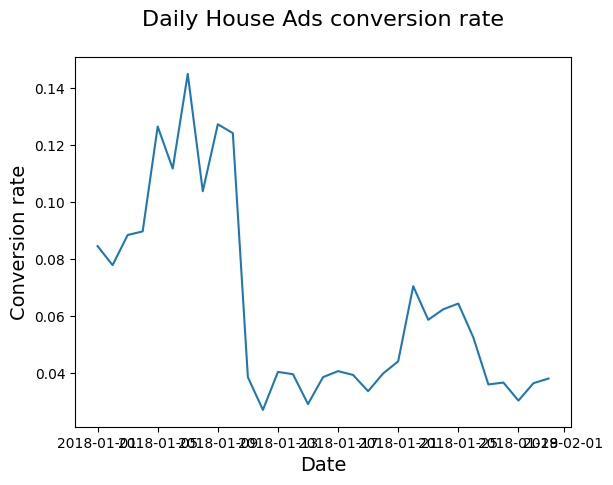

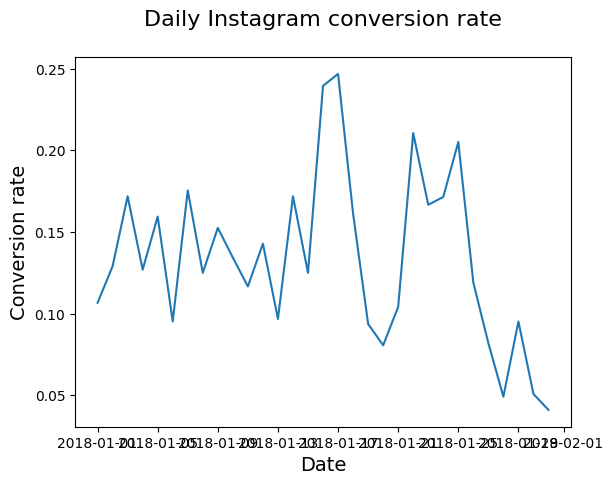

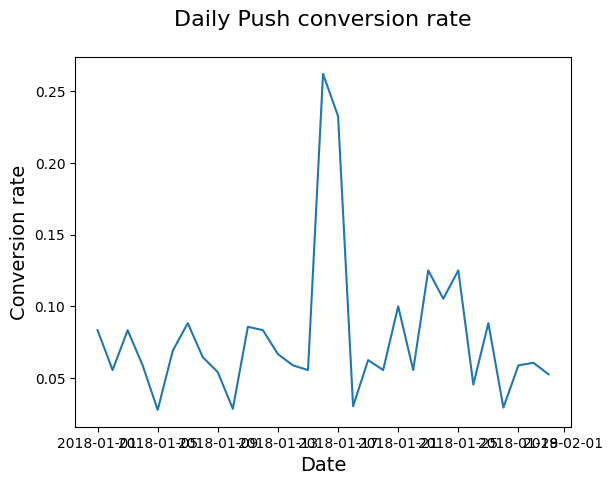

<Figure size 640x480 with 0 Axes>

In [133]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served',
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

In [134]:
# Check the House Ads rate

print(daily_conv_channel.index.max())

daily_conv_channel[(daily_conv_channel.index > '2018-01-09') & (daily_conv_channel.index < '2018-01-13')]

# in the date 2018-01-11 house ads has decrement rate in compare the previous day

2018-01-31 00:00:00


marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-10,0.500000,0.109375,0.124260,0.134328,0.028571
2018-01-11,0.666667,0.120690,0.038710,0.116667,0.085714
2018-01-12,0.500000,0.114754,0.027211,0.142857,0.083333


In [135]:
marketing.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code', 'is_correct_lang', 'DoW'],
      dtype='object')

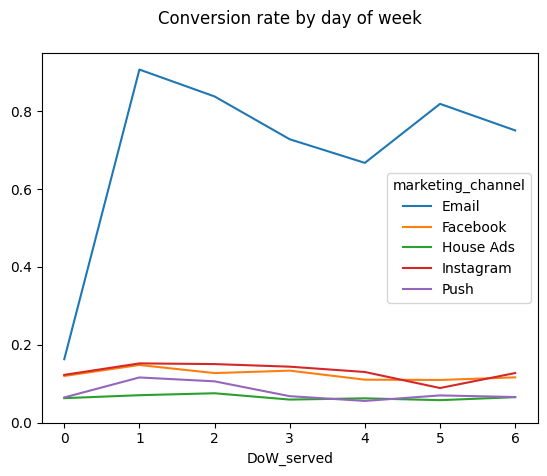

In [136]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

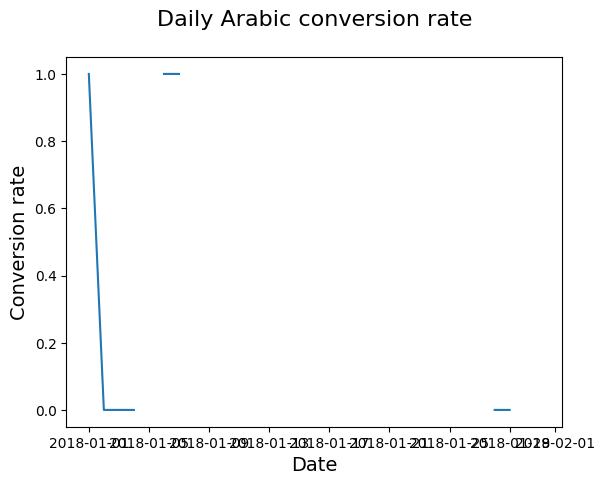

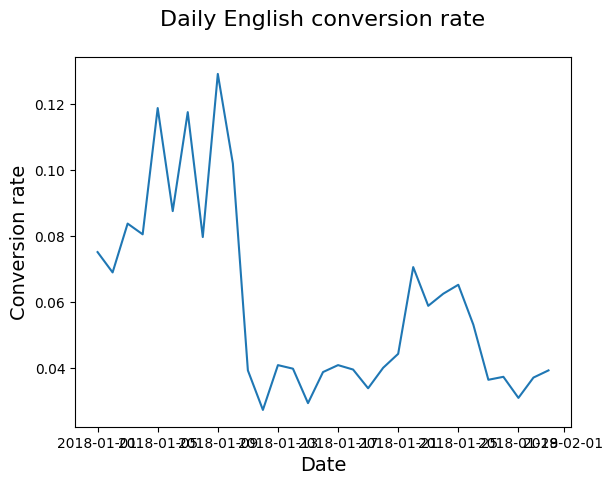

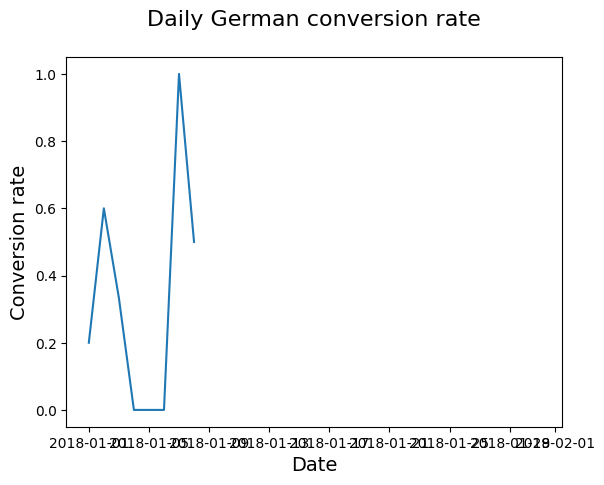

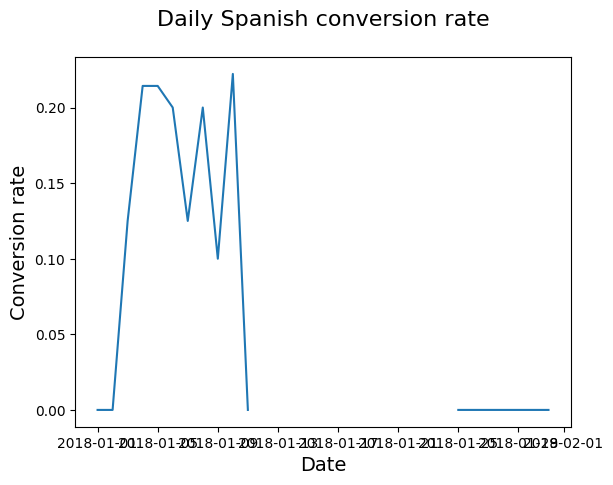

<Figure size 640x480 with 0 Axes>

In [137]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In [138]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'],
    'Yes',
    'No')

# Group b date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/var/folders/xy/0r3_1y9d2lb3rl3znp1dmszc0000gn/T/ipykernel_96772/4263338435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


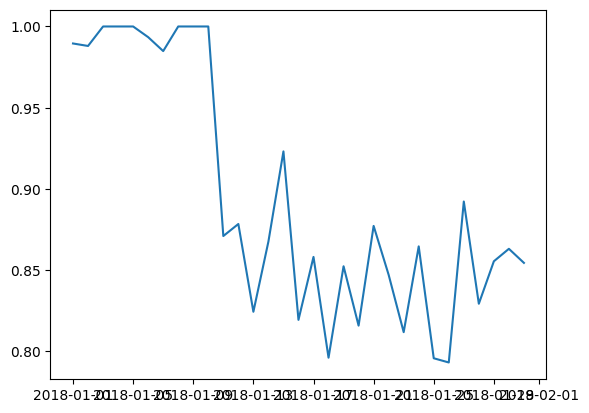

In [139]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index, language_check_df['pct'])
plt.show()

In [140]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv[lang_conv.index[3]]/lang_conv[lang_conv.index[1]]
arabic_index = lang_conv[lang_conv.index[0]]/lang_conv[lang_conv.index[1]]
german_index = lang_conv[lang_conv.index[2]]/lang_conv[lang_conv.index[1]]

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [141]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  
2018-01-06               2  
2018-01-07               1  
2018-01-08               2  
2018-01-09               1  
2018-01-10               4  
2018-01-11               0  
2018-01-12               1  
2018-01-13               0  
2018-01-14               0  
2018-01-15               0  
2018-01-16               0  
2018-01-17               4  
2018-01-18               0  
2018-01-19               0  
2018-01-20               0  
2018-01-21               0  
2018-01-22               0  
2018-01-23               0  
2018-01-24               0  
2018-01-25               0  
2018-01-26               2  
2018-01-27               1  
2018-01-28               2  
2018-01-29               0  
2018-01-30               2  
2018-01-31               1

In [142]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate'] * spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate'] * arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate'] * german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']*converted_df[('user_id','Spanish')]/100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']*converted_df[('user_id','Arabic')]/100
converted_df['expected_german_conv'] = converted_df['expected_german_rate']*converted_df[('user_id','German')]/100

In [143]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


## A/B Testing for marketing

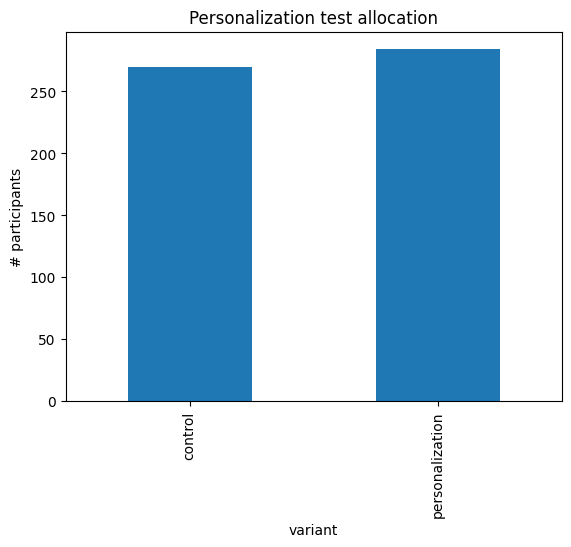

In [144]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [145]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


## Calculating lift & significance testing

In [165]:
def lift(a,b):
    # Calculate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift_res = (b_mean-a_mean)/a_mean
  
    return str(round(lift_res * 100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


## A/B testing & segmentation

In [159]:
marketing['language_displayed'].unique()

array(['English', 'German', 'Arabic', 'Spanish'], dtype=object)

In [186]:
marketing['converted_num'] = np.where(marketing['converted'] == True, 1, 0)
email_segment1 = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['language_displayed'] == 'Spanish')]
subscribers_segment = email_segment1.groupby(['user_id', 'variant'])['converted_num'].max()
subscribers_segment

#email_segment1

user_id     variant        
a100000645  personalization    1
a100000649  personalization    1
a100000655  personalization    1
a100000686  personalization    1
a100002386  control            1
a100002394  control            0
a100002401  control            1
a100002409  control            0
a100002416  control            0
a100002425  control            0
a100002434  control            1
a100002442  control            0
Name: converted_num, dtype: int64

In [188]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(f"subsegment: {subsegment}")
      
      # Creating new columns converted_num for numeric values
      marketing['converted_num'] = np.where(marketing['converted'] == True, 1, 0)
      # Limit marketing to email and subsegment
      email_segment = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]
      
      subscribers_segment = email_segment.groupby(['user_id', 'variant'])['converted_num'].max()
      subscribers_segment = pd.DataFrame(subscribers_segment.unstack(level=1)) 
      control_segment = subscribers_segment['control'].dropna()
      personalization_segment = subscribers_segment['personalization'].dropna()

      print('lift:', lift(control_segment, personalization_segment)) 
      print('t-statistic:', ttest_ind(control_segment, personalization_segment), '\n\n')

In [189]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

subsegment: Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


subsegment: English
lift: 39.0%
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


subsegment: German
lift: -1.62%
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062678, df=42.0) 


subsegment: Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.04015671811047753, df=10.0) 




/Users/danielquintana/personal_projects/python_projects/python-data-engineer-projects/working-with-databases/venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [190]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

subsegment: 0-18 years
lift: 121.4%
t-statistic: TtestResult(statistic=-2.966044912142212, pvalue=0.003872449439129706, df=89.0) 


subsegment: 19-24 years
lift: 106.24%
t-statistic: TtestResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195, df=105.0) 


subsegment: 24-30 years
lift: 161.19%
t-statistic: TtestResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337, df=114.0) 


subsegment: 30-36 years
lift: -100.0%
t-statistic: TtestResult(statistic=3.185906464414798, pvalue=0.002323848743176535, df=58.0) 


subsegment: 36-45 years
lift: -85.23%
t-statistic: TtestResult(statistic=2.431790127931851, pvalue=0.017975686009788244, df=61.0) 


subsegment: 45-55 years
lift: -72.22%
t-statistic: TtestResult(statistic=2.0654991273179326, pvalue=0.04306233968820124, df=62.0) 


subsegment: 55+ years
lift: -100.0%
t-statistic: TtestResult(statistic=3.326565456420339, pvalue=0.0016358623456360468, df=51.0) 


